# D206 Data Cleaning
#### By: Orland Cole Malphrus
#### 5/2/2021

## PART I: Research Question
#### A:  Describe one question or decision that you will address using the data set you chose.
 Can we accurately predict which individual patients are likey to require redamission based on their patient profile? That is, can we create a model that will identify the likleyhood of readmission based on data collected during the initial visit? Furthermore to address this question, we must address the question of which individual data features correlate with the readmission rate.

### B: Describe the variables in the data set 

The data set contains 10,000 patient records from a hospital that hopes to assess the likelihood of patient readmission. The data set contains a column labeled “ReAdmis” which is the target variable in the analysis. The Readmission data point is a categorical variable that is boolean. The readmission data point reads “yes” if the patient was readmitted to the hospital within a month. 

The data set is also comprised of many other independent variables that must be considered. These variables will be assessed to determine potential predictors of our target variable. These variables fall into four main categories.

1. Patient medical condition: medical condition data points are primarily categorical and contain boolean “yes/no” or “0/1” values. For example, the data set contains a “BackPain” column where if the patient has back chronic back pain the column would contain a “yes” value and if the patient does not have chronic back pain the value would be “no”. high blood pressure, stroke, obesity, arthritis, diabetes, and a few others follow this same pattern. The “VitD_levels” column is an example of an exception to this pattern as this data column Mesures Vitamine D levels as a numerical value.
2. Patient Information: patient information columns are columns that contain information about the patient’s stay. This includes information such as the type of initial admission, treatments received, and the number of days hospitalized. The patient information contains categorical data exemplified by the type of initial admission which is broken down into three categories “emergency admission”, “elective admission”, “observation”. The patient information also contains numerical data such as the number of days hospitalized which contains a count of the number of days the patient stayed in the hospital.
3. patient demographic information: the patient demographic data includes items such as the geographic location, income level, age, and regional population. This data categorical data based such as the country of residence on the patients billing address as well as numerical data such as the income of the patient.
4. Survey Data: The survey data contains 8 questions about the perceived importance of certain aspects of the hospital experience. The data points are stored as numerical ratings on a scale of 1 to 8 with 1 being most important and being the least important.


## Part II: Data Cleaning Plan

### C: Explain the plan for cleaning the data by doing the following:

#### C1. The Approach that will be used to discover anomalies in the data:
1. The data will be imported from the CSV file and into a python pandas DataFrame.
2. The data labels will be identified and checked for alignment with the data dictionary provided by the hospital.
3. A new Index field will be created if one is not satasfoctoraly provided in the pre existing data set.
4. Check for duplicate data entries in the dataframe using pandas build in duplicated method.
5. Check categorical data for consistency in category labels. Using the unique method to determine the categories 
6. The data sets columns will be scanned to discover columns with missing values. These columns will be noted for further action when it comes to mitigating abnormalities. This will be done using pandas built in null and na checking.
7. Columns in the data frame that contain numerical values will be anylized In two separate ways. First the numerical values will be plotted in a histogram. Secondly the data will be standardized and then plotted using matplotlib’s box plot functionality. This will aim to identify columns with outliers that could potentially be anomalies. 
8. The 8 survey items in the data set will be anylized separately from the other numerical values. Since the data dictionary specifies the range of values allowed on the survey as numbers between one and 8 we can scan for anomalies with a pandas min and max functions.


####  C2. justification of aproach

    The approach laid out on the above steps is in line with many of the industry’s best practices. The importing of the CSV into pandas enables the use of more advanced cleaning technics than that which are possible in a CSV text file. Then reviewing the file to ensure its alignment with the data dictionary will give us confidence in our future analysis that what we see in the dictionary is what we have to work with. This would normally be accompanied by an updating of the data dictionary to show any changes made but that is beyond the scope of this project. The adding of an index field that begins its count at 0 aligned with pythons default which is indexing starting at 0. Adding this ID column will provide an anchor point for future analytics.
	
    Checking the data set for duplicates in the data set is critical to the integrity of the overall analysis. Duplicate data can distort measures of central tendency as well as skew results of more advanced analytics. This is also true of consistency errors with category labels. This is why it was important to review the consistency of categorical labels. This check ensures that something as simple as a capitalization error does not create two categories where one is needed thereby throwing off analysis.
	
    Missing values pose another threat to our analytics making it important to identify. Using pandas we can quickly find and determine the severity of our missing data problem. It is also important to discover and deal with missing values before we analyze for outliers. Missing data can skew standard deviation or the Z-scores and could lead to mislabeling normal data as outliers.
	
    Identify outliers using boxplots provides a visual representation of the quantity and severity of outliers in the data set. Furthermore using standardized data in these boxplots gives consistency to the variation in numerical data points. This allows us to analyze the outliers of different data points using a common scale and metric. Before using the standardized box plot method a histogram was used to provide more clarity to the distribution of outliers. This eliminated the possibility of skewing perception with standardization.
	
    The survey questions were handled differently than the other numerical values. This is due to the limited range and nature of the survey. With all options being between 1and 8 as long as all answers were integers in that range the risk of distortion is negligible.


#### C3. justification of tools

For the cleaning of this data set, we will use python. Python being an extremely capable general-purpose programming language leaves nothing to be desired in terms of effectiveness. This along with Python exceptional packages such a NumPy, Pandas, and Matplotlib make it the perfect choice. 

- NumPy: Allows for efficient array operations that are not native to python. NumPy is essential to working with pandas and provides great efficiency gains as it is an extension written in lower-level languages.
- Pandas: Provides the DataFrame object as well as many additional operations for manipulating and working with data. Pandas also provide much-needed querying functionality for quickly assessing our data.
- MatPlotLib: Provides a python toolkit for creating various visualizations to our data. This includes but is not limited to scatterplots, boxplots, and Histograms.

Python is also the programming language of choice by the analyst on this project. The analyst enjoys the added benefit of 4+ years of python programming experience as a software engineer. This comfort with the language and its subsequent toolset played a large role in the decision to use python.


#### C4: Code 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')

In [2]:
# using pandas read_csv method we are able to read in the data from the csv file
# by setting pd options we are able to ensure that our data columns are not truncated allowing 
# us to be able to view all columns provided
df = pd.read_csv('./medical_raw_data.csv')
pd.set_option('display.max_columns', 55)

In [3]:
# by utilizing the dataframes head method we can view the first 5 rows of our dat aframe
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


##### Observations after visual review of data structure
1. Their is an unamed row that apears in our data set containing an integer value. Although it apears to be an index row it would be unsave to make such an assumption as it does not show this in the data dictionary. There for to midigate confusion it will be removed. 
2. Their does not apear to be an index row in the data frame that adhears to the python convention of indexing begining with 0. due to this an index will be created and added to the dataframe.
3. The columns  "Overweight" and "Anxietey" store boolean values as 0 or 1. While this may be acceptable in many data sets it deviates from the standards set forth in the data dictionary. To mitigate this we will convert the 0 values to "no" and the 1 values to "yes" to better comply with the standards of the data set.


In [4]:
# Removing the unnamed and unidentified  column from the dataset
# adding an "ID" column for reference thruout the cleaning process
df.drop(["Unnamed: 0","Interaction","UID","CaseOrder"], axis=1, inplace=True)
df["ID"] = pd.Series(range(0,10000))

In [5]:
# Lising columns to insure the unnamed column has been fropped and the id column has been added
df.columns

Index(['Customer_id', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng',
       'Population', 'Area', 'Timezone', 'Job', 'Children', 'Age', 'Education',
       'Employment', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8',
       'ID'],
      dtype='object')

In [6]:
# defined a dunction to convert digital booleans into strings complient with our data dictionary
# used pandas apply method and a lambda function to converet the "Anxiety" and "Overweight" columns to 
# a complient format
# Then reused the head method to ensure the change had been made sucsesfully
def digitalBool_to_string(s):
    if s == 1.0 or s == "Yes":
        return "Yes"
    elif s == 0.0 or s == "No":
        return "No"
    else:
        return np.nan

df["Anxiety"] = df["Anxiety"].apply(lambda s: digitalBool_to_string(s))
df["Overweight"] = df["Overweight"].apply(lambda s: digitalBool_to_string(s))
df.loc[:,["Anxiety", "Overweight"]]

,Anxiety,Overweight
0,Yes,No
1,NaN,Yes
2,NaN,Yes
3,NaN,No
4,No,No
...,...,...
9995,Yes,NaN
9996,No,Yes
9997,Yes,Yes
9998,No,Yes


#### Check for Duplicate data 

In [7]:
# using pandas dataframe duplicated method which sets a row to True if it is a duplicate and False if it is not
# then we use the value_counts method to determan the number of rows that evaluated to true
df.duplicated().value_counts()

False    10000
dtype: int64

#### Checking for consistency in Categorical Names

In [8]:
# All unique categories seem consistent and without repeats
df["Education"].value_counts()

Regular High School Diploma                 2444
Bachelor's Degree                           1724
Some College, 1 or More Years, No Degree    1484
9th Grade to 12th Grade, No Diploma          832
Associate's Degree                           797
Master's Degree                              701
Some College, Less than 1 Year               642
Nursery School to 8th Grade                  552
GED or Alternative Credential                389
Professional School Degree                   208
No Schooling Completed                       133
Doctorate Degree                              94
Name: Education, dtype: int64

In [9]:
# All unique categories seem consistent and without repeats
df["Area"].value_counts()

Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64

In [10]:
df["Job"].value_counts()

Outdoor activities/education manager     29
Theatre director                         27
Exhibition designer                      27
Scientist, audiological                  26
Marketing executive                      25
                                         ..
Public relations account executive        6
Engineer, control and instrumentation     6
Licensed conveyancer                      6
Phytotherapist                            6
Government social research officer        6
Name: Job, Length: 639, dtype: int64

In [11]:
# Asses the number of unique data sets
# the quantity and diversity is large enough on this categorical column that its 
#usefulness as it stands is in question bellow is the quantity of categories
len(df["Job"].unique())

639

In [12]:
# All unique categories seem consistent and without repeats
df["Employment"].unique()

array(['Full Time', 'Retired', 'Unemployed', 'Student', 'Part Time'],
      dtype=object)

In [13]:
# All unique categories seem consistent and without repeats
df["Marital"].unique()

array(['Divorced', 'Married', 'Widowed', 'Never Married', 'Separated'],
      dtype=object)

In [14]:
# All unique categories seem consistent and without repeats
df["Complication_risk"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [15]:
# All unique categories seem consistent and without repeats
df["Services"].unique()

array(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], dtype=object)

### searching for missing values in data

In [16]:
# Gathering the sum of all null values by column
# Filtering out columns that have a count of 0 indicating no null values found
# displaying the number of rows with null values by column
count_of_null_by_column = df.isnull().sum()
nonzero = count_of_null_by_column > 0
count_of_null_by_column[nonzero]

Children        2588
Age             2414
Income          2464
Soft_drink      2467
Overweight       982
Anxiety          984
Initial_days    1056
dtype: int64

In [17]:
# Calculating the percentage of null values in each row
# Filtering out columns that have a count of 0 indicating no null values found
# displaying the percentage of rows with null values by column
percentage_of_null_by_column = (df.isnull().sum() / 10000) * 100
nonzero = percentage_of_null_by_column > 0

percentage_of_null_by_column[nonzero]

Children        25.88
Age             24.14
Income          24.64
Soft_drink      24.67
Overweight       9.82
Anxiety          9.84
Initial_days    10.56
dtype: float64

#### Mitigation of missing variable
Unfortunatly our data set is missing a large amount of data. Do to this we are forced to employ mitigation tactics to ensure our future anylasis is not adversly affected. We will do this in the following ways.
1. The "Overweight","Anxiety", "Soft_drink" columns all contain boolean values of either yes or no. for theas columns we will add a third categorical options which is "Unknown". The reason for this choice is the large percentage off missing data. Imputing the most common of the boolean values could greatly skew mesears of central tendency and imputing yes no values based on known distrabutions would create unwanted noise in the data. The new unknown category may also be its own valid point of interest in the data as patterns may apear aound the missing information.
2. "Children","Age", "Income", "Initial_days" For the Income and Inital_Days columns we will impute the median value in the place of missing data. This will allow for statistical anylasis to be preformed. The Children and Age columns will be converted to categorical data because the amount of data missing is not acceptable. This will allow us to avoid discarding the data due to the nearly 25% NaN rate by creating an "Unknown" category.

In [18]:
# using pandas describe function to asses the data before midigation
df.loc[:,["Overweight","Anxiety", "Soft_drink"]].describe()

,Overweight,Anxiety,Soft_drink
count,9018,9016,7533
unique,2,2,2
top,Yes,No,No
freq,6395,6110,5589


In [19]:
df["Overweight"].fillna("Unknown", inplace=True)
df["Anxiety"].fillna("Unknown", inplace=True)
df["Soft_drink"].fillna("Unknown", inplace=True)

In [20]:
#This code is the same as previously used to show percentages of missing values by rows
#used here to show the sucsess of midigation

# Calculating the percentage of null values in each row
# Filtering out columns that have a count of 0 indicating no null values found
# displaying the percentage of rows with null values by column
percentage_of_null_by_column = (df.isnull().sum() / 10000) * 100
nonzero = percentage_of_null_by_column > 0

percentage_of_null_by_column[nonzero]

Children        25.88
Age             24.14
Income          24.64
Initial_days    10.56
dtype: float64

##### Midigation of missing numerical values

In [21]:
# # using pandas describe function to asses the data before midigation
df.loc[:,["Children","Age", "Income", "Initial_days"]].describe()

,Children,Age,Income,Initial_days
count,7412.000000,7586.000000,7536.000000,8944.000000
mean,2.098219,53.295676,40484.438268,34.432082
std,2.155427,20.659182,28664.861050,26.287050
min,0.000000,18.000000,154.080000,1.001981
25%,0.000000,35.000000,19450.792500,7.911709
50%,1.000000,53.000000,33942.280000,34.446941
75%,3.000000,71.000000,54075.235000,61.124654
max,10.000000,89.000000,207249.130000,71.981486


In [22]:
# using pandas build in fill na method to replace missing values with the median value of the column
df["Income"].fillna(df["Income"].median(), inplace=True)
df["Initial_days"].fillna(df["Initial_days"].median(), inplace=True)


In [23]:
# define a function to break down numerical "Children" data into categorical data
def number_of_children_categories(s):
    if type(s) == str:
        return s
        
    if s == 0:
        return "None"
    elif s <= 2:
        return "1-2"
    elif s < 6:
        return "3-5"
    elif s >= 6:
        return "6+"

# Convert numerical value of children to a categorical value
df["Children"] = df["Children"].apply(lambda s: number_of_children_categories(s))
# replacing missing values in data to "Unknown"
df["Children"].fillna( "Unknown", inplace=True)

# Display Children column to check for desired outcomes
df["Children"]

0           1-2
1           3-5
2           3-5
3          None
4       Unknown
         ...   
9995    Unknown
9996        3-5
9997        3-5
9998        3-5
9999         6+
Name: Children, Length: 10000, dtype: object

In [24]:
# define a function to break down numerical "Age" data into categorical data
def age_to_categories(s):
    if type(s) == str:
        return s
        
    if s < 30:
        return "0-29"
    elif s < 50:
        return "30-49"
    elif s < 70:
        return "50-69"
    elif s >= 70 :
        return "70+"

# Convert numerical value of age to a categorical value
df["Age"] = df["Age"].apply(lambda s: age_to_categories(s))
# replacing missing values in data to "Unknown"
df["Age"].fillna( "Unknown", inplace=True)

# Display Age column to check for desired outcomes
df["Age"]

0         50-69
1         50-69
2         50-69
3           70+
4          0-29
         ...   
9995       0-29
9996        70+
9997    Unknown
9998      30-49
9999    Unknown
Name: Age, Length: 10000, dtype: object

In [25]:
#This code is the same as previously used to show percentages of missing values by rows
#used here to show the sucsess of midigation

# Calculating the percentage of null values in each row
# Filtering out columns that have a count of 0 indicating no null values found
# displaying the percentage of rows with null values by column
percentage_of_null_by_column = (df.isnull().sum() / 10000) * 100
nonzero = percentage_of_null_by_column > 0

percentage_of_null_by_column[nonzero]

Series([], dtype: float64)

#### Discover of Outliers

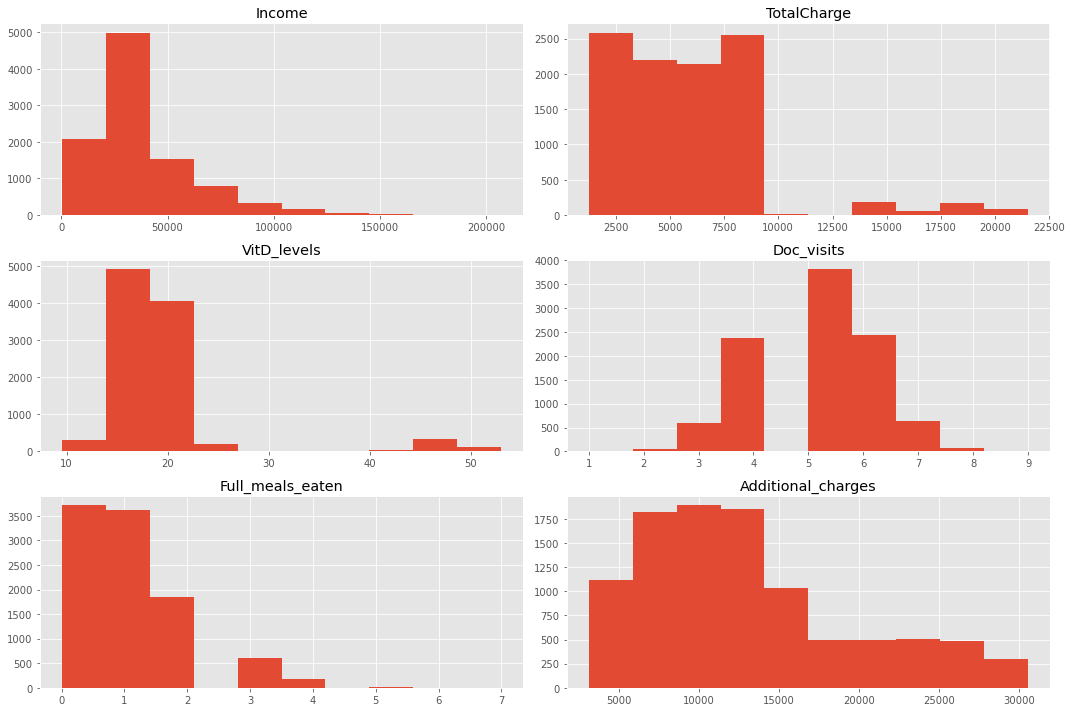

In [26]:
# Create histograms Numerical values to identify outliers
# Using pandas and matplot lib
plots = df[['Income', "TotalCharge","VitD_levels", "Doc_visits", "Full_meals_eaten", "Additional_charges"]].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

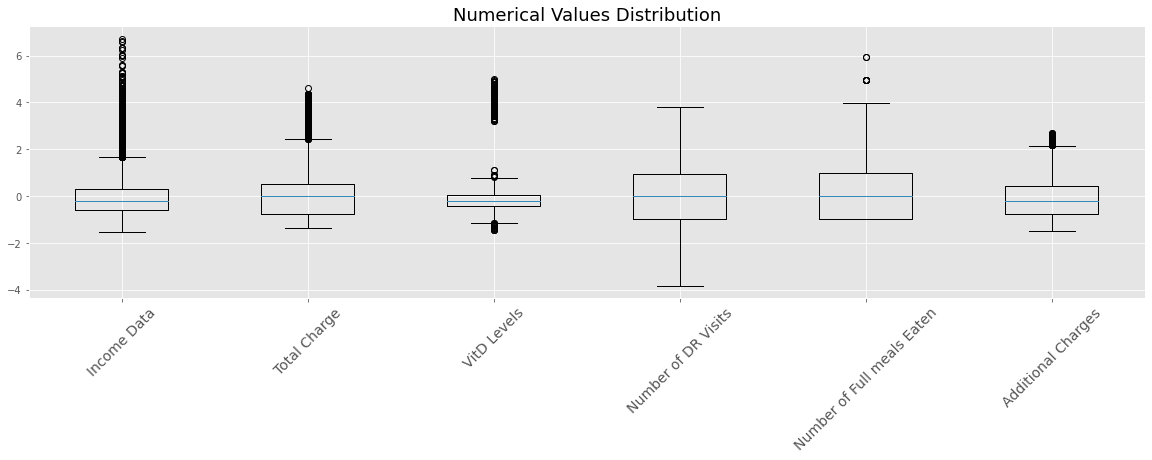

In [27]:
# 1. Standardize all numerical data
# 2. Use Box Plots of all numerical data to observe outliers

std_income_data = (df["Income"] - df["Income"].mean()) /df["Income"].std()
std_total_charge = (df["TotalCharge"] - df["TotalCharge"].mean()) /df["TotalCharge"].std()
std_vitd_data = (df["VitD_levels"] - df["VitD_levels"].mean()) /df["VitD_levels"].std()
std_docvisit_data = (df["Doc_visits"] - df["Doc_visits"].mean()) /df["Doc_visits"].std()
std_Full_meals_eaten = (df["Full_meals_eaten"] - df["Full_meals_eaten"].mean()) /df["Full_meals_eaten"].std()
std_Additional_charges = (df["Additional_charges"] - df["Additional_charges"].mean()) /df["Additional_charges"].std()

plt.figure(figsize=(20,5)) 
plt.title("Numerical Values Distribution", size=18)
plt.boxplot([
    std_income_data,
    std_total_charge,
    std_vitd_data,
    std_docvisit_data,
    std_Full_meals_eaten, # Concerned that this is mearly a function of time in hospital
    std_Additional_charges
]) 
plt.xticks(
    [1,2,3,4,5, 6],
    [
    "Income Data",
    "Total Charge",
    "VitD Levels",
    "Number of DR Visits",
    "Number of Full meals Eaten",
    "Additional Charges"
    ],
    rotation=45,
    size=14
           
)
plt.show()

#### Survey Item Check
Survey questions are allowed contain integer values between 1 and 8. This check will determin that no values exist outside of those constraints

In [28]:
# This query shows that all values are accounted for in the "count" row
# the min and max indicates that the max and min value in each row is within the acceptable range

df.loc[:, "Item1":"Item8"].describe().iloc[[0,3,-1]]

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,8.0,7.0,8.0,7.0,7.0,7.0,7.0,7.0


In [29]:
# this query shows the data type and the counts
df.loc[:, "Item1":"Item8"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Item1   10000 non-null  int64
 1   Item2   10000 non-null  int64
 2   Item3   10000 non-null  int64
 3   Item4   10000 non-null  int64
 4   Item5   10000 non-null  int64
 5   Item6   10000 non-null  int64
 6   Item7   10000 non-null  int64
 7   Item8   10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


## Part III: Data Cleaning

#### D1: Cleaning Findings
The initial examination revealed an unidentified column that appeared to be an old index column. This column was removed and replaced with a more accurate ID column. While comparing the head of the dataframe the anxiety and overweight columns stood out as not adhearing to the correct format described in the data dictionary.

During our check for duplicates, it was found that there were no repeated rows in our data set. During this, it was also noted that there was no inconsistency in categorical data labels in the data set. The only potential exception to this was the “job” column which contained 639 unique values. A more in-depth analysis of the job titles would be needed to guarantee the integrity of the categories. 

The data set contained a high amount of missing values. The “children”, “age”, “income” and ”soft_drink” columns were around 25% Na or NAN. The “Overweight”, “Anxiety” and “inital_days” columns were around 10% Na or NAN.  This creates a large issue for future analysis.

The findings of our outlier analysis showed quite a few columns containing outliers. The “Full meals” column contained only a few outliers. The  “Vit D levels” column contained outliers on both ends of the normal range with quite a few outliers well beyond 2 standard deviations away. The income and charge data also contained outliers that were not unexpected.

The analysis of the survey data revealed a normal range with nothing of note.



#### D2: Justification of Methods

The "Overweight", "Anxiety", "Soft_drink" columns all contain boolean values of either yes or no. for these columns we added a third categorical option which is "Unknown". The reason for this choice is the large percentage of missing data. Imputing the most common of the boolean values could greatly skew measures of central tendency and imputing yes no values based on known distributions would create unwanted noise in the data. The new unknown category may also be its valid point of interest in the data as patterns may appear around the missing information.

"Children", "Age", "Income", "Initial_days" For the Income and Inital_Days columns we will impute the median value in the place of missing data. This will allow for statistical analysis to be performed. The Children and Age columns will be converted to categorical data because the amount of data missing is not acceptable. This will allow us to avoid discarding the data due to the nearly 25% NaN rate by creating an "Unknown" category.

In terms of handling outliers, we chose to leave the outliers in the dataset. The charges as well as the income data while containing many outliers align well with common knowledge of income distribution across the globe. The charge data also does not indicate that the outliers are errors as it can be assumed that there would be certain cases that acquire a large charge. The full meals column contains outliers and would need a consult from a subject matter expert at the hospital to determine if this was an error so nothing can be done before that. The Vit D level outliers also need a consult with a medical expert before determining if the outliers are errors in readings or simply extreme cases.



#### D3: Summary of Outcomes
- Removing the unidentified column and replacing it with the ID index column created clarity and consistency for future analysis
- Standardizing the boolean fields in line with the data dictionary allows for greater confidence going into the next phase of the data analytics life cycle
- Scanning for duplicates in the data set and the categorical data also increases confidence in future analysis by ensuring data consistency and integrity
- Replacing missing boolean values with an unknown category creates a third type of data point to the target in future analysis
- Replacing missing numerical values with the median allows for consistency in statistical analysis and will reduce errors encountered in later analysis
- Converting numerical value columns with categorical labels allows us to continue using data even in light of the high percentage of missing values. The dictionary will need to be updated to note the new categorical values
- The decision to leave the categories containing outliers will not affect the data set as it stands but will be important to remember as the analysis progresses.


#### D4: See Code above and panopto presentation

#### D5: See attached d206_clean.csv

In [30]:
# Extract Clean dataset
df.to_csv('d206_clean.csv')

#### D6: Limitations
The limitations to this data cleaning project can be summarized by two factors. The first is a lack of domain knowledge. Without an understanding of the medical field is difficult to assess if outliers are errors or simply extraordinary circumstances. The second factor is access to the collectors of data. Without being able to contact the individuals or departments that were responsible for gathering the data it is not possible to determine the reason certain values are missing or skewed.

#### D7: Effect of limitations
The limitations of access and domain knowledge may inhibit the ability of analysts to determine key factors in data. This is since someone with domain knowledge will have more clear insights into the meaning of the collected data more than someone who does not. However, an inverse relationship may occur where since the analyst does not have domain knowledge he may be able to discover key factors that a subject matter expert may be blind to due to bias. 

The limitations of access to the collectors of data will limit the ability of the analyst to increase the precision of the model beyond a certain point as data can not be recovered thru interviews with the collectors of the data.


The limitations of access to the collectors of data will limit the ability of the analyst to increase the precision of the model beyond a certain point as data can not be recovered thru interviews with the collectors of the data.


### Principle Component Anylassis

In [31]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [32]:
# separating out numerical data points
numerical_cols = [
    "VitD_levels",
    "VitD_supp",
    "Full_meals_eaten",
    "Doc_visits",
    "Initial_days",
    "TotalCharge",
    "Additional_charges"
] + ["Item1","Item2","Item3","Item4","Item5","Item6","Item7","Item8"]
numerical_df = df.loc[:, numerical_cols]

In [33]:
# normalizing the numerical data
data_normalized = (numerical_df - numerical_df.mean()) / numerical_df.std()
data_normalized.head(3)

,VitD_levels,VitD_supp,Full_meals_eaten,Doc_visits,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,-0.239518,-0.634681,-0.993337,0.944599,-0.959278,-0.799539,0.764967,-0.502730,-0.489648,-1.463173,-1.462054,0.488355,-0.506114,-0.483647,0.470397
1,-0.062177,0.956397,0.990560,-0.967932,-0.776505,-0.496404,0.715078,-0.502730,0.476699,-0.494890,0.467923,0.488355,0.462525,-0.483647,-0.489009
2,-0.296996,-0.634681,-0.001389,-0.967932,-1.193129,-1.099597,0.698600,-1.471754,0.476699,0.473394,0.467923,-0.482337,0.462525,-0.483647,-0.489009


In [59]:
# define number of componants desired
n_components_desired = data_normalized.shape[1]
# extansiated the PCA class
pca = PCA(n_components=n_components_desired)
# fit the data
pca.fit(data_normalized)
# Labeling the PCA component columns
columns=[f"PC{i+1}" for i in range(n_components_desired)]
# displayed a list of the explained varience ration by component
list(pca.explained_variance_ratio_)

[0.19694557519839118,
 0.13003643228100362,
 0.1097425889579864,
 0.06950751213940139,
 0.06771958744174288,
 0.06637469413483776,
 0.0654069996442076,
 0.0644805726044333,
 0.051484024721683834,
 0.0465193097002268,
 0.039244135598235606,
 0.035581355897161215,
 0.03155617758224267,
 0.021824407555206204,
 0.003576626543239642]

In [57]:
for pc, var in zip(columns, np.cumsum(pca.explained_variance_ratio_)):
    print(pc, var)

PC1 0.19694557519839118
PC2 0.32698200747939477
PC3 0.43672459643738115
PC4 0.5062321085767826
PC5 0.5739516960185255
PC6 0.6403263901533632
PC7 0.7057333897975708
PC8 0.7702139624020041
PC9 0.8216979871236879
PC10 0.8682172968239147
PC11 0.9074614324221503
PC12 0.9430427883193115
PC13 0.9745989659015543
PC14 0.9964233734567605
PC15 1.0


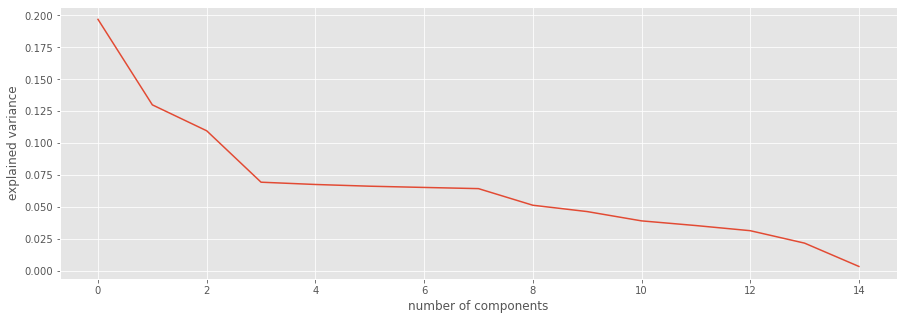

In [35]:
# plot explained variance ration
plt.figure(figsize=(15,5))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

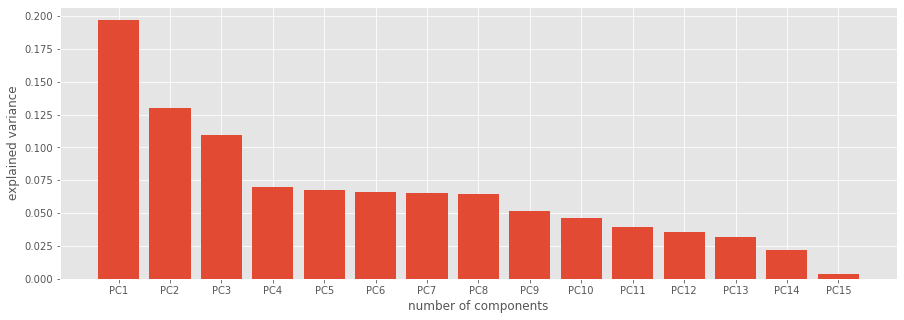

In [36]:
# plot explained variance ration as a bar chart
plt.figure(figsize=(15,5))
plt.bar(columns, pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [37]:
# calculating eigenvalues using numpy array multiplication and list comprehension
cov_matrix = np.dot(data_normalized.T, data_normalized) / data_normalized.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
eigenvalues

[2.9538882096130488,
 1.9503514295666162,
 1.6459742204863435,
 1.042508420822802,
 1.0156922322449713,
 0.9955208499813567,
 0.9810068841636403,
 0.9671118682075843,
 0.7721831447881705,
 0.6977198665388461,
 0.588603167770133,
 0.5336669664235668,
 0.4732953294672624,
 0.3273333767167581,
 0.053644033208779]

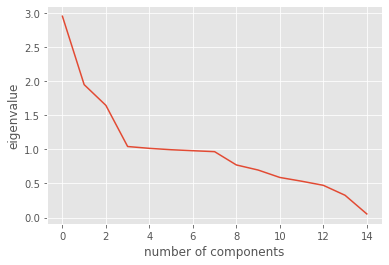

In [38]:
# plotting eigenvalues for better visuilization
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()

In [44]:
# calculationg the PCA loading values
loadings = pd.DataFrame(pca.components_.T, columns=columns, index=data_normalized.columns)
loadings.iloc[:,0:5]

,PC1,PC2,PC3,PC4,PC5
VitD_levels,-0.009560,0.540957,0.052098,0.358130,0.015282
VitD_supp,-0.005161,0.032064,0.009649,-0.326656,0.622945
Full_meals_eaten,-0.000499,-0.012428,0.020410,0.629819,-0.155030
Doc_visits,0.007094,-0.005071,-0.007725,0.097878,0.562067
Initial_days,-0.020689,0.445543,0.066614,-0.432342,-0.063815
TotalCharge,-0.018678,0.701623,0.082333,0.007896,-0.019172
Additional_charges,0.003902,0.030985,-0.010270,0.411699,0.516559
Item1,0.454809,-0.024702,0.295614,0.006683,0.003015
Item2,0.428522,-0.025244,0.291948,-0.015642,0.005126
Item3,0.395335,-0.024448,0.295314,-0.009022,-0.003486


In [47]:
# transforming PCA data into a useable data frame
pca_data = pd.DataFrame(pca.transform(data_normalized), columns = columns)

In [52]:
# Export pca data with eigenvalue>1 to a new dataframe
pca_data_final = pca_data.iloc[:,0:5]
pca_data_final

,PC1,PC2,PC3,PC4,PC5
0,-1.514425,-1.194578,0.272671,0.321425,0.779842
1,-0.360703,-0.693492,-0.109910,0.820670,0.318910
2,-0.203531,-1.398417,-0.798086,0.783590,-0.497511
3,2.396507,-1.455304,0.354197,0.535375,-0.844118
4,-2.404398,-1.620502,-0.276557,-1.544020,1.110270
...,...,...,...,...,...
9995,-2.112054,0.209656,-0.125961,-0.393089,-0.450468
9996,-0.659645,0.840961,1.505641,-0.069253,0.898850
9997,-1.893514,-0.007652,0.179145,0.718807,-0.915463
9998,0.819565,1.173406,0.998508,-0.370188,-0.039006


#### E1. Principle Components
Our PCA started with 15 numerical values and therefore 15 PCs. After analysis, it was determined that the first 11 of our PCs accounted for 90% of the variation. After calculating the eigenvalues it was determined that only the first 5PCs had scored over 1 although PC6 and PC7 had eigenvalues on .995 and .98 putting them right on the bubble. This left us with 5 principal components for future analysis.

- PC1
- PC2
- PC3
- PC4
- PC5

As the result of examining the loading of each of these PCs we can determine that the factors that played the largest roles in these first 5 PCs are:

- VitD_levels
- VitD_supp
- Full_meals_eaten
- Doc_visits
- Initial_days
- Total_chage
- Additional_charge
- Survey Items 1, 2 , 5 and 6


#### E2. Identification Process
For the sake of the PCA, the data frame was reduced to only contain numerical values. These numerical values were then standardized to ensure numerical values with larger ranges such as income did not overwhelm values with smaller ranges such as VitD level. 

Then using SkLearns build in PCA functionality we fit the standardized data. After the data was fitted we were able to view the explained variance ratio for each of our principal components. We were then able to analyze the running total using NumPy’s “.cumsum” method.  This is how we were able to determine that 90% of the variance could be explained by PC1 thru PC11. 

After this, we were able to plot out the explained variance ratio using both a scree plot and a box plot. This enabled us to better understand the ratios visually before moving on to the eigenvalues.

We then calculated the eigenvalues for using NumPy’s built-in array multiplication function. With the eigenvalues, we were able to determine that only the first 5 PCs earned an eigenvalue of 1 or greater. This allowed us to reduce the PCs down to PC1 thru PC5.  We then plotted the eigenvalues and could visually see that PC6 and PC7 just barely missed the cut-off. This is an important note for future analysis.

Finally, we were able to create a data frame that contained the loading values for each of our principal components. Thru this, we can discover the above list of key factors that played a significant role in our 5 PCs. The criterion used for the list above was arbitrarily chosen to be a loading value of .4 or greater in one or more of the 5 PCs with eigenvalues greater than or equal to one. 


#### E3. Organizational Benifit

The organization benefits from the result of this PCA in two main ways. First is that the PCA reduces the data to a more manageable 5 numerical values. This will lead to faster future analysis especially if the system is productionized and running continuously. The reduction of data using this PCA will also allow the organization to maintain a large portion of the data in the key reduction process.

The second organizational benefit of the PCA is identifying the features in the data set that account for the largest portion of the variability. Without further analysis, it is not possible to determine which features are the most correlated with our target variable however there is still great value in identifying features that tend to cause variability. This means organizationally we will be able to observe these key features such as VitD Level and initial_days more closely with the understanding that they are important causes of variation within our PCs. This will allow our organization to focus more on these factors as potential indicators of readmission.


### Part IV. Supporting Documents

#### F. Panopto Presentation

#### G. Sources

- Poulson, B. (2016, September 6). Data science foundations: Data mining [Video]. LinkedIn Learning. https://www.linkedin.com/learning/data-science-foundations-data-mining/welcome?u=2045532.

- Vallisneri, M. (2018, July 17). Python statistics essential training [Video]. LinkedIn Learning. https://www.linkedin.com/learning/python-statistics-essential-training/welcome?u=2045532

- Ekker, R. (2018, May 24). Pandas playbook: Manipulating data [Video]. Pluralsight. https://www.pluralsight.com/courses/pandas-playbook-manipulating-data

- Ekker, R. (2018, May 24). Pandas playbook: Manipulating data [Video]. Pluralsight. https://www.pluralsight.com/courses/pandas-playbook-manipulating-data

-

In [ ]:
Part IV. Supporting Documents